In [ ]:
#Primero cargamos las bibliotecas a utilizar 
# 1 de marzo de 2021
# Cargamos las bibliotecas para trabajar en Algebra Lineal

import numpy as np
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow

import matplotlib.pyplot as plt
%matplotlib inline

Primero calcularemos 2I + 3A + AB 

In [ ]:
# Empezamos definiendo las matrices, nos vamos en orden 
# Primero la matriz A 
A = np.array([[1,3],[-1,7]])
print(A)

[[ 1  3]
 [-1  7]]


In [ ]:
# Hacemos el mismo procedimiento pero ahora para la matriz B 
B = np.array([[5,2],[1,2]])
print(B)

[[5 2]
 [1 2]]


In [ ]:
# Y antes de empezar con las operaciones definimos la matriz I 
I=np.eye(2, dtype=int)
print(I)

[[1 0]
 [0 1]]


In [ ]:
# Hacemos las operaciones correspondientes 
R=(2*I)+(3*A)+(A@B)
print('El resultado es')
print(R)

El resultado es
[[13 17]
 [-1 35]]


Potencias de Matrices

In [ ]:
# Vamos a definir una matriz M 
M= np.array([[1,2],[3,4]])
print(M)

[[1 2]
 [3 4]]


In [ ]:
# Cuadrado: M^2 = M@M
print(M@M)
print(mpow(M,2))

[[ 7 10]
 [15 22]]
[[ 7 10]
 [15 22]]


In [ ]:
# Quinta potencia: M^5 = M@M@M@M@M
print(M@M@M@M@M)
print(mpow(M,5))

[[1069 1558]
 [2337 3406]]
[[1069 1558]
 [2337 3406]]


Matriz Transpuesta $M^T$

In [ ]:
# La matriz M y su transpuesta
print(M)
print(M.T)

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]


In [ ]:
# El producto de M por M.T, debe ser una matriz simétrica.
M @ M.T

array([[ 5, 11],
       [11, 25]])

Ejercicio 2. Los polinomios característicos y el Teorema de Cayley-Hamilton.

El polinomio característico de una matriz M esta dado en general por la ecuación$$
\det(M - \lambda I) = 0
$$

In [ ]:
# Definimos una matriz M junto con la traza y el determinante 
M = np.array([[1,2],[3,4]])
trM = np.trace(M)
M_det = la.det(M)


print('M = ',M)

print('tr(M) = ', trM)

print('det(M) = ', M_det)

M =  [[1 2]
 [3 4]]
tr(M) =  5
det(M) =  -2.0


In [ ]:
# Matriz identidad 
I = np.eye(2, dtype=int)
print(I)

[[1 0]
 [0 1]]


In [ ]:
# Teorema de Cayley-Hamilton
PM = M_det*I - trM*M + M@M

print(PM)

[[0. 0.]
 [0. 0.]]



Ejercicio 3\ Resuelve el sistema de ecuaciones.$$\begin{eqnarray*}
x - 3 y + z & = & 1 \\ \nonumber
3 x - 4y + z & = & 5 \\ \nonumber
2 y - z & = & 0 \\ \nonumber
\end{eqnarray*}$$        Utilizando el Método de Eliminación Gaussiana y la función scipy.linalg.solve()

In [ ]:
# Implementación del método de eliminación Gaussiana
# Definimos 3 funciones

# Intercambio de posición de renglones.
def switch_rows(A,i,j):
  "Intercambiar renglones i y j en la Matriz A."
  n=A.shape[0]
  E=np.eye(n)
  E[i,i]=0
  E[j,j]=0
  E[i,j]=1
  E[j,i]=1
  return E @ A

# Multiplicar un renglón por un aconstante no nula.
def scale_row(A,k,i):
  "Multiplicar el renglón i por k en la Matriz A."
  n=A.shape[0]
  E=np.eye(n)
  E[i,i]=k
  return E @ A

# Sumar un múltiplo de un renglón a otro renglón.
def add_row(A,k,i,j):
  "Sumar k vaces el renglón j al renglón i en la Matriz A."
  n=A.shape[0]
  E=np.eye(n)
  if i== j:
    E[i,j]=k+1
  else:
    E[i,j]=k
  return E @ A

In [ ]:
# Matriz J
J = np.array([[1,-3,1],[3,-4,1],[0,2,-1]])

In [ ]:
#Matriz Aumentada Z: Unimos la Matriz H con la Matriz Identidad
Z = np.hstack([J,np.eye(3)])
print(Z)

[[ 1. -3.  1.  1.  0.  0.]
 [ 3. -4.  1.  0.  1.  0.]
 [ 0.  2. -1.  0.  0.  1.]]


In [ ]:
# 1 
Z1 = add_row(Z,-3,1,0)
print(Z1)

[[ 1. -3.  1.  1.  0.  0.]
 [ 0.  5. -2. -3.  1.  0.]
 [ 0.  2. -1.  0.  0.  1.]]


In [ ]:
# 2
Z2 = scale_row(Z1,1,1)
print(Z2)

[[ 1. -3.  1.  1.  0.  0.]
 [ 0.  5. -2. -3.  1.  0.]
 [ 0.  2. -1.  0.  0.  1.]]


In [ ]:
# 3
Z3 = add_row(Z2,4,1,2)
print(Z3)

[[ 1. -3.  1.  1.  0.  0.]
 [ 0. 13. -6. -3.  1.  4.]
 [ 0.  2. -1.  0.  0.  1.]]


In [ ]:
# 4 
Z4 = add_row(Z3,2,0,1)
print(Z4)

[[  1.  23. -11.  -5.   2.   8.]
 [  0.  13.  -6.  -3.   1.   4.]
 [  0.   2.  -1.   0.   0.   1.]]


In [ ]:
# 5 
Z5 = scale_row(Z4,3/2,1)
print(Z5)

[[  1.   23.  -11.   -5.    2.    8. ]
 [  0.   19.5  -9.   -4.5   1.5   6. ]
 [  0.    2.   -1.    0.    0.    1. ]]


 función scipy.linalg.solve()

In [ ]:

# Definiendo el vector b
b=np.array([1,5,0]).reshape(3,1)
print(b)

[[1]
 [5]
 [0]]


In [ ]:
# Resolviendo el sistema de ecuaciones usando scipy.linalg.solve
x_sol=la.solve(J,b)
print(x_sol)

[[3.]
 [2.]
 [4.]]


Ejercicio 4:

Dadas las siguientes matrices $B_1, B_2$ y $B_3$

(Ejemplos del artículo de Wikipedia sobre Eigenvalores y Eigenvectores)

$$\begin{equation*}
B_1 = \begin{bmatrix}
2 & 0 & 0 \\
0 & 3 & 4 \\
0 & 4 & 9 \\
\end{bmatrix}
\end{equation*}$$$$\begin{equation*}
B_2 = \begin{bmatrix}
0 & 1 & 0 \\
0 & 0 & 1 \\
1 & 0 & 0 \\
\end{bmatrix}
\end{equation*}$$$$\begin{equation*}
B_3 = \begin{bmatrix}
2 & 0 & 0 & 0\\
1 & 2 & 0 & 0 \\
0 & 1 & 3 & 0 \\
0 & 0 & 1 & 3 \\
\end{bmatrix}
\end{equation*}$$
Encuentra los eigenvalores y eigenvectores de cada matriz utilizando la función de scipy.linalg.eig(), y contrasta tus resultados en cada caso con los que se desarrollan en los ejemplos de la Wikipedia

In [ ]:
# Empezamos definiendo las matrices B1 

B1 = np.array([[2,0,0],[0,3,4],[0,4,9]])

print(B1)

[[2 0 0]
 [0 3 4]
 [0 4 9]]


In [ ]:
# Obtenemos los eigenvalores/vectores con la biblioteca scipy.linalg.eig()
# Primero para la matriz B1 
eigvals1, eigvecs1 = la.eig(B1)
print('Los eigenvalores de B1:')
print(np.round(eigvals1,2))
print('Los eigenvectores de B1:')
print(np.round(eigvecs1,2))
print('             ')

Los eigenvalores de B1:
[11.+0.j  1.+0.j  2.+0.j]
Los eigenvectores de B1:
[[ 0.    0.    1.  ]
 [ 0.45  0.89  0.  ]
 [ 0.89 -0.45  0.  ]]
             


In [ ]:
# Ahora definimos la matriz B2 

B2 = np.array([[0,1,0],[0,0,1],[1,0,0]])

print(B2)

[[0 1 0]
 [0 0 1]
 [1 0 0]]


In [ ]:
eigvals2, eigvecs2 = la.eig(B2)
print('Los eigenvalores de B2:')
print(np.round(eigvals2,2))
print('Los eigenvectores de B2:')
print(np.round(eigvecs2,2))
print('             ')


Los eigenvalores de B2:
[-0.5+0.87j -0.5-0.87j  1. +0.j  ]
Los eigenvectores de B2:
[[ 0.58+0.j   0.58-0.j  -0.58+0.j ]
 [-0.29+0.5j -0.29-0.5j -0.58+0.j ]
 [-0.29-0.5j -0.29+0.5j -0.58+0.j ]]
             


In [ ]:
# Por ultimo definimos la matriz B3 

B3 = np.array([[2,0,0,0],[1,2,0,0],[0,1,3,0],[0,0,1,3]])

print(B3)

[[2 0 0 0]
 [1 2 0 0]
 [0 1 3 0]
 [0 0 1 3]]


In [ ]:
eigvals3, eigvecs3 = la.eig(B3)
print('Los eigenvalores de B3:')
print(np.round(eigvals3,2))
print('Los eigenvectores de B1:')
print(np.round(eigvecs3,2))
print(eigvecs1)

Los eigenvalores de B3:
[3.+0.j 3.+0.j 2.+0.j 2.+0.j]
Los eigenvectores de B1:
[[ 0.    0.    0.    0.  ]
 [ 0.    0.    0.58 -0.58]
 [ 0.    0.   -0.58  0.58]
 [ 1.   -1.    0.58 -0.58]]
[[ 0.          0.          1.        ]
 [ 0.4472136   0.89442719  0.        ]
 [ 0.89442719 -0.4472136   0.        ]]


Ejercicio 5. Se tienen los siguientes 8 puntos:

$$\begin{eqnarray*} 
(x& ,& y) \\
(0.0 & ,&  0.0), \\ 
(0.5 & ,&  0.47942), \\ 
(1.0 & ,&  0.84147), \\
(1.5 & ,&  0.99749), \\
(2.0 & ,&  0.90930), \\
(2.5 & ,&  0.59847), \\
(3.0 & ,&  0.14112), \\
(3.5 & ,&  -0.35078) \\
\end{eqnarray*}$$
Encuentre un polinomio interpolante $p(x)$ que pase por los 8 puntos.

Sobreponga la función $y=\sin(x)$ y contrástela con el polinomio $p(x)$.

In [ ]:
# Separamos las componentes en x & y 
# Primero las componentes del eje x 
x = np.array([0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5])

# Ahora las componentes del eje y 
y = np.array([0.0,0.47942,0.84147,0.99749,0.90930,0.59847,0.14112,-0.35078])

In [ ]:
# Imprimimos los puntos para asegurarnos que si sean los correctos 

pp = np.array([[x],[y]])

print(pp)

[[[ 0.       0.5      1.       1.5      2.       2.5      3.
    3.5    ]]

 [[ 0.       0.47942  0.84147  0.99749  0.9093   0.59847  0.14112
   -0.35078]]]


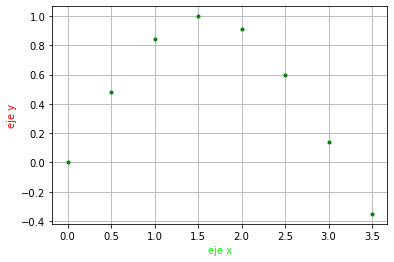

In [ ]:
# Ahora imprimimos la grafica con los puntos correspondientes 

# Gráficamos los puntos dados que vamos a interpolar.
plt.plot(x,y,'r.', color='g')
plt.grid()
plt.xlabel('eje x', color='lime')
plt.ylabel('eje y', color='r')
plt.show()

In [ ]:
#La biblioteca Numpy tiene una función para crear la matriz de Vandemonde
X = np.vander(x, increasing=True)
#Solo imprimimos los primeros 5 renglones y columnas
print(X[:7,:7])

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 5.00000000e-01 2.50000000e-01 1.25000000e-01
  6.25000000e-02 3.12500000e-02 1.56250000e-02]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.50000000e+00 2.25000000e+00 3.37500000e+00
  5.06250000e+00 7.59375000e+00 1.13906250e+01]
 [1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01]
 [1.00000000e+00 2.50000000e+00 6.25000000e+00 1.56250000e+01
  3.90625000e+01 9.76562500e+01 2.44140625e+02]
 [1.00000000e+00 3.00000000e+00 9.00000000e+00 2.70000000e+01
  8.10000000e+01 2.43000000e+02 7.29000000e+02]]


In [ ]:
# Vector y
y = np.array(y).reshape(8,1)


In [ ]:
# Usamos la función de scipy.linalg.solve(), para encontrar los 8 coeficientes 
# de la solución lineal Xa=y
a = la.solve(X,y)
print(np.round(a,7))

[[ 0.0000000e+00]
 [ 1.0006718e+00]
 [-3.7079000e-03]
 [-1.5886790e-01]
 [-8.3022000e-03]
 [ 1.3196400e-02]
 [-1.5449000e-03]
 [ 2.4600000e-05]]


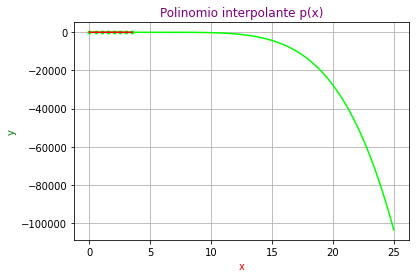

In [ ]:
#Graficamos el polinomio interpolante y los puntos interpolados
xs = np.linspace(0,25,150)
ys = sum([a[k]*xs**k for k in range(0,8)])
plt.plot(x,y,'r.',xs,ys,color='lime')
plt.plot(x, np.sin(x), color='red')
plt.grid()
plt.title('Polinomio interpolante p(x)', color='purple')
plt.xlabel('x',color='r')
plt.ylabel('y', color='g')
plt.show()

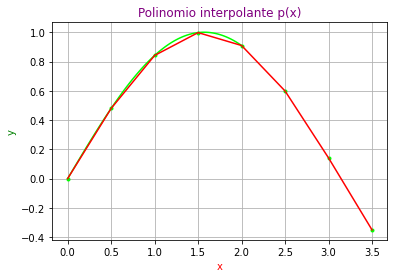

In [ ]:
# Vamos a imprimir la misma grafica pero con otros valores en la parte de Xs

#Graficamos el polinomio interpolante y los puntos interpolados
xs = np.linspace(0,2,100)
ys = sum([a[k]*xs**k for k in range(0,8)])
plt.plot(x,y,'r.',xs,ys,color='lime')
plt.plot(x, np.sin(x), color='red')
plt.grid()
plt.title('Polinomio interpolante p(x)', color='purple')
plt.xlabel('x',color='r')
plt.ylabel('y', color='g')
plt.show()

Como pudimos ver si modificamos Xs tenemos una grafica diferente 

Ejercicio 6. Regrese a su modelo de análisis de series de tiempo. Haga una descomposición de su serie de tiempo de las temperaturas (Tmax y Tmin), y realice una regresión lineal sobre la serie de Tendencia de Temp $(T = a_0 + a_1 t)$. Encuentre si la pendiente es positiva o negativa de la tendencia (signo de $a_1$), es decir si las Temperaturas (Tmax, Tmin) están subiendo o bajando en el periodo analizado.

In [ ]:
# Pronóstico de Series de Tiempo

# Importamos las bibliotecas a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas para el análisis de Series de Tiempo y Modelos de Pronóstico
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
import pandas.util.testing as tm

# Suprimir mensajes de alertas de cambios futuros
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Matplotlib mostrará los resultados en la Notebook de Jupyter
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
url = 'https://raw.githubusercontent.com/Abel-Lemus/Computacional-1-/main/Actividad6/26061.txt'

# Definimos los nombres de las columnas
# El archivo tiene códigos ASCII extendido (Español), encoding='cp1251'
# El separador de datos es de uno o más espacios, sep='\s+'
# Se brincará los primeros 19 renglones y el último, afirmamos que no nay encabezado
# Se procesan los datos utilizando Python, engine='python' 
my_cols = ['Fecha','Precip','Evap','Tmax','Tmin',]
df_Navojoa = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python') 

# Hacemos una copia de trabajo y preservamos el dataframe original
df_NAV = df_Navojoa.copy()

# Cambiamos la palabra nulo por un vacío y verificamos
str_Nulo = 'Nulo'
df_Nvojoa = df_NAV.replace(to_replace=str_Nulo, value='', regex=True)

# Convertimos los valores de las variables ambientales a números flotantes y verificamos 
cols_list = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in cols_list:
  df_Nvojoa[cols] = pd.to_numeric(df_NAV[cols], errors='coerce')

# Definimos un nuevo dataframe por si hay que regresarse
df_new = df_Nvojoa.copy()
df_new['Fecha'].head()

# Se convierte el objeto Fecha a variable fecha que python reconoce
df_new['Fecha'] = pd.to_datetime(df_new['Fecha'], dayfirst=True).copy()

# Añadimos dos columnas adicionales: df['Año'], df['Mes']
# Usaremos la función .dt.year y .dt.month para extraer el Año y Mes de la Fecha
df_new['Año'] = df_new['Fecha'].dt.year
df_new['Mes'] = df_new['Fecha'].dt.month

# Hacemos una copia del trabajo y es con el que trabajaremos para el análisis de datos
df_met = df_new.copy()

# Eliminamos la columna de Mes(numérico) y agregamos Mes(caractéres)
df_met.drop('Mes', axis=1, inplace=True)
df_met['Mes'] = df_met['Fecha'].dt.strftime('%b')

# Nueva copia del DataFrame para Series de Tiempo
df_met_ts = df_met.copy()

# Reemplazamos el índice por la variable 'Fecha' 
df_met_ts = df_met.set_index('Fecha')
df_met_ts.info()

# Seleccionaremos un conjunto de años de 30 años
df_60 = df_met_ts[(df_met_ts['Año'] >= 1922) & (df_met_ts['Año'] < 1953)]
df_70 = df_met_ts[(df_met_ts['Año'] >= 1953) & (df_met_ts['Año'] < 1985)]
df_90 = df_met_ts[(df_met_ts['Año'] >= 1985) & (df_met_ts['Año'] < 2016)]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25775 entries, 1922-01-01 to 2016-04-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Precip  25739 non-null  float64
 1   Evap    19131 non-null  float64
 2   Tmax    24841 non-null  float64
 3   Tmin    24837 non-null  float64
 4   Año     25775 non-null  int64  
 5   Mes     25775 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ MB


In [ ]:
# Método de descomposición usando la biblioteca statsmodels.tsa
ts_Tmax = df_60.Tmax
decomposicion_Tmax = sm.tsa.seasonal_decompose(ts_Tmax.interpolate(), model='additive', freq=365)

trend_Tem = decomposition_TMX.trend
trend_Tem = trend_Tem[~np.isnan(trend_Tem)]
print(trend_Tem)

Fecha
1922-07-02    30.323562
1922-07-03    30.325753
1922-07-04    30.332877
1922-07-05    30.333425
1922-07-06    30.344384
                ...    
1943-10-31    35.517397
1943-11-01    35.481507
1943-11-02    35.447808
1943-11-03    35.412466
1943-11-04    35.385342
Name: Tmax, Length: 4477, dtype: float64


In [ ]:

#Empezamos el analisis haciendo una primera serie de tiempo para analizar, la cual corresponde a la epoca de 1953 a 1985

#Fechas de inicio y fin, para filtrar la informacion.
start, end = '1957-09','1963-09'

ts_70=df_70.loc[start:end].copy()
ts_70.head()

,Precip,Evap,Tmax,Tmin,Año,Mes
Fecha,,,,,,
1960-02-04,0.0,NaN,24.3,NaN,1960,Feb
1960-02-05,0.0,NaN,27.5,6.9,1960,Feb
1960-02-06,0.0,NaN,26.8,8.1,1960,Feb
1960-02-07,0.0,NaN,26.7,9.0,1960,Feb
1960-02-08,0.0,NaN,27.5,9.8,1960,Feb


In [ ]:
# Método de descomposición usando la biblioteca statsmodels.tsa
ts_Tmax = df_90.Tmax
decomposicion_Tmax = sm.tsa.seasonal_decompose(ts_Tmax.interpolate(), model='additive', freq=365)


In [ ]:
tem_Tmax = decomposicion_Tmax.trend
tem_Tmax = tem_Tmax[~np.isnan(tem_Tmax)]
print(tem_Tmax)

Fecha
1985-07-02    30.623288
1985-07-03    30.647945
1985-07-04    30.664384
1985-07-05    30.675342
1985-07-06    30.686301
                ...    
2015-06-28    33.061644
2015-06-29    33.023288
2015-06-30    32.982192
2015-07-01    32.952055
2015-07-02    32.924658
Name: Tmax, Length: 10754, dtype: float64


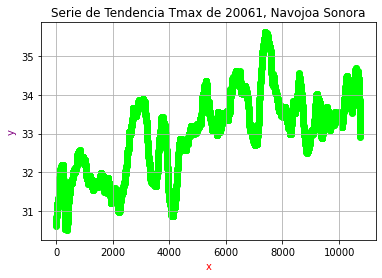

In [ ]:
x = np.arange(0,10754)
y = tem_Tmax
plt.scatter(x,y, color = "lime");
plt.grid()
plt.title('Serie de Tendencia Tmax de 20061, Navojoa Sonora')
plt.xlabel('x', color = "r")
plt.ylabel('y', color = "purple")
plt.show()

In [ ]:
# Construimos la matriz de Vandermonde
X = np.column_stack([np.ones(10754),x])

print(X[:5,:5])

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]]


In [ ]:
# Usamos la función scipy.linalg.solve() para resolver la ecuación X.T@X@a = X.T@y respecto a 'a'
a = la.solve(X.T @ X, X.T @ y)
print(a)

[3.17378454e+01 2.38175274e-04]


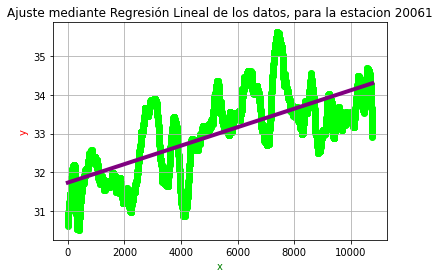

In [ ]:
# Graficamos el ajuste con esos 2 coeficientes de la regresión y = a_0 + a_1 x 
xs = np.linspace(0,10754,40)
ys = a[0] + a[1]*xs
plt.plot(xs,ys,'purple',linewidth=4)
plt.scatter(x,y, color = "lime");
plt.grid()
plt.title('Ajuste mediante Regresión Lineal de los datos, para la estacion 20061')
plt.xlabel('x', color = "g")
plt.ylabel('y', color = "r")
plt.show()

Repetimos el mismo procedimiento pero para la temperatura minima 

In [ ]:
# Método de descomposición usando la biblioteca statsmodels.tsa
ts_temp_min = df_90.Tmin
decomposicion_Tmin = sm.tsa.seasonal_decompose(ts_temp_min.interpolate(), model='additive', freq=365)

In [ ]:
tem_Tmin = decomposicion_Tmin.trend
tem_Tmin = tem_Tmin[~np.isnan(tem_Tmin)]
print(tem_Tmin)

Fecha
1985-07-02    16.813699
1985-07-03    16.821918
1985-07-04    16.830137
1985-07-05    16.838356
1985-07-06    16.852055
                ...    
2015-06-28    17.948630
2015-06-29    17.910274
2015-06-30    17.874658
2015-07-01    17.841781
2015-07-02    17.804795
Name: Tmin, Length: 10754, dtype: float64


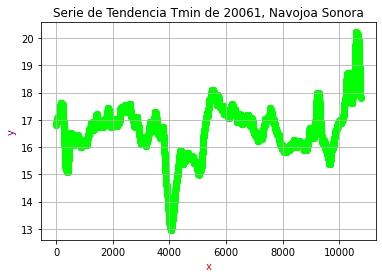

In [ ]:
x = np.arange(0,10754)
y = tem_Tmin
plt.scatter(x,y, color = "lime");
plt.grid()
plt.title('Serie de Tendencia Tmin de 20061, Navojoa Sonora')
plt.xlabel('x', color = "r")
plt.ylabel('y', color = "purple")
plt.show()

In [ ]:
# Usamos la función scipy.linalg.solve() para resolver la ecuación X.T@X@a = X.T@y respecto a 'a'
a = la.solve(X.T @ X, X.T @ y)
print(a)

[1.62819581e+01 6.24497257e-05]


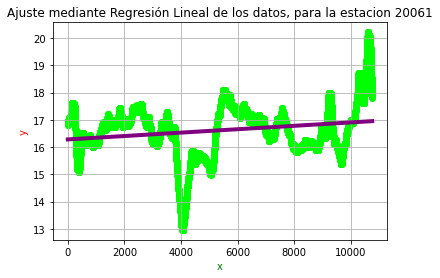

In [ ]:
# Graficamos el ajuste con esos 2 coeficientes de la regresión y = a_0 + a_1 x 
xs = np.linspace(0,10754,40)
ys = a[0] + a[1]*xs
plt.plot(xs,ys,'purple',linewidth=4)
plt.scatter(x,y, color = "lime");
plt.grid()
plt.title('Ajuste mediante Regresión Lineal de los datos, para la estacion 20061')
plt.xlabel('x', color = "g")
plt.ylabel('y', color = "r")
plt.show()

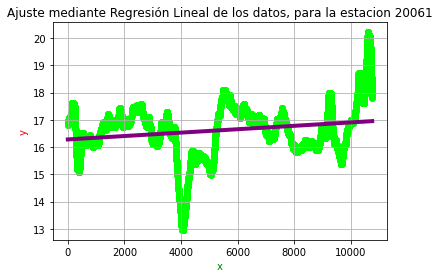

In [ ]:
# Graficamos el ajuste con esos 2 coeficientes de la regresión y = a_0 + a_1 x 
xs = np.linspace(0,10754,80)
ys = a[0] + a[1]*xs
plt.plot(xs,ys,'purple',linewidth=4)
plt.scatter(x,y, color = "lime");
plt.grid()
plt.title('Ajuste mediante Regresión Lineal de los datos, para la estacion 20061')
plt.xlabel('x', color = "g")
plt.ylabel('y', color = "r")
plt.show()